In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter

In [5]:
dataset = pd.read_excel(r'QVI_transaction_data.xlsx')

In [6]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# SUMMARIZATION

In [7]:
dataset.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [37]:
len(dataset)

264836

In [38]:
dataset['TXN_ID'].nunique()

263127

In [40]:
dataset[dataset.duplicated(['TXN_ID'])].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8


In [42]:
dataset.loc[dataset['TXN_ID'] == 48887, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [47]:
dataset.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [68]:
#Dates in our dataset is not in right format

def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900,1,1)
    if (xlserialdate<60):
        delta_in_days = datetime.timedelta(days = (lserialdate-1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate-2))
    converted_date = excel_anchor+delta_in_days
    return converted_date

In [ ]:
dataset['DATE'] = dataset['DATE'].apply(xlseries_to_datetime)

In [71]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [72]:
# Extract weighs out of 'PROD_NAME'

dataset['PACK_SIZE'] = dataset['PROD_NAME'].str.extract("(\d+)")
dataset['PACK SIZE'] = pd.to_numeric(dataset['PACK_SIZE'])
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,150


# CHECKING FOR OUTLIERS

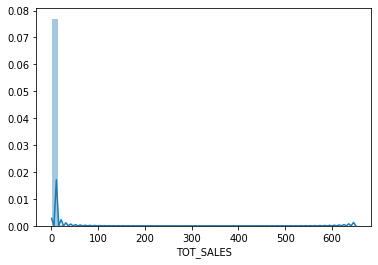

In [12]:
sns.distplot(dataset.TOT_SALES)

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_data = dataset.select_dtypes(include=numerics)

In [24]:
numeric_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


# REMOVING OUTLEIRS FROM DATASET

In [32]:
cleandata = numeric_data[numeric_data['TOT_SALES']<9.000]

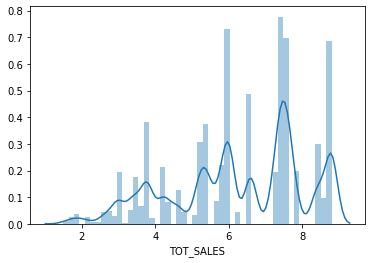

In [33]:
sns.distplot(cleandata.TOT_SALES, kde = True)

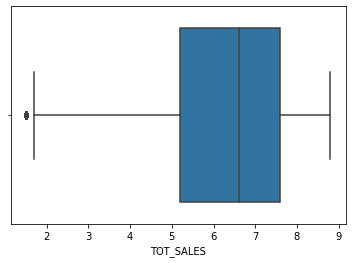

In [34]:
sns.boxplot(cleandata.TOT_SALES)

# DATA FORMATS

In [35]:
dataset.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object